# Advanced Numerical Analysis

## Exercise 21

*Prove that each Gershgorin circle of a* $2\times 2$ *real symmetric matrix contains at least one eigenvalue. Find an example of a* $3\times 3$ *real symmetric matrix where some Gershgorin circle contains no eigenvalue.*

Let $A = \big(\begin{smallmatrix} a_1 & a_3 \\ a_3 & a_2 \end{smallmatrix}\big)$ for $a_1, a_2, a_3 \in \mathbb{R}.$ Then $A$ is symmetric and has the real eigenvalues $\lambda_{1,2} = \frac{1}{2} \big( a_1 + a_2 \pm \sqrt{(a_1 - a_2)^2 + 4a_3^2} \big)$ and Gershgorin circles $C_1 = \{z\in\mathbb{C} : |z-\max\{a_1, a_2\}| \le |a_3|\}$ and $C_2 = \{z\in\mathbb{C} : |z-\min\{a_1, a_2\}| \le |a_3|\}.$ Then

$\lambda_1 \le \frac{1}{2} \big( a_1 + a_2 + |a_1 - a_2| + 2 |a_3| \big) = \max\{a_1, a_2\} + |a_3| \Rightarrow \lambda_1 \ge \max\{a_1, a_2\}$

$\lambda_2 \ge \frac{1}{2} \big( a_1 + a_2 - |a_1 - a_2| - 2 |a_3| \big) = \min\{a_1, a_2\} - |a_3| \Rightarrow \lambda_2 \le \min\{a_1, a_2\}$

$\Rightarrow \lambda_1 \in C_1$ and $\lambda_2 \in C_2.$

The following plots Gershgorin circles and eigenvalues of a random $2 \times 2$ matrix with uniformly sampled entries from $(-1, 1).$

In [8]:
function plot_Gershgorin(A)
    % A ... any n by n matrix with complex entries
    % plots Gershgorin circles and eigenvalues in the complex plane
    
    hold on
    
    % plotting eigenvalues
    eigenvalues = eig(A);
    scatter(eigenvalues, zeros(length(A), 1), "linewidth", 25);
    
    % plotting Gershgoring circles
    centers = diag(A);
    radii = sum(abs(A), dim=2) - abs(centers);
    t = linspace(0, 2*pi, 100);
    for i=1:length(A)
        circle_x = radii(i) .* cos(t) + real(centers(i));
        circle_y = radii(i) .* sin(t) + imag(centers(i));
        plot(circle_x, circle_y, "linewidth", 5);
    endfor
    
    title("Gershgorin circles and eigenvalues");
    xlabel("Real axis");
    ylabel("Imaginary axis");
    
endfunction

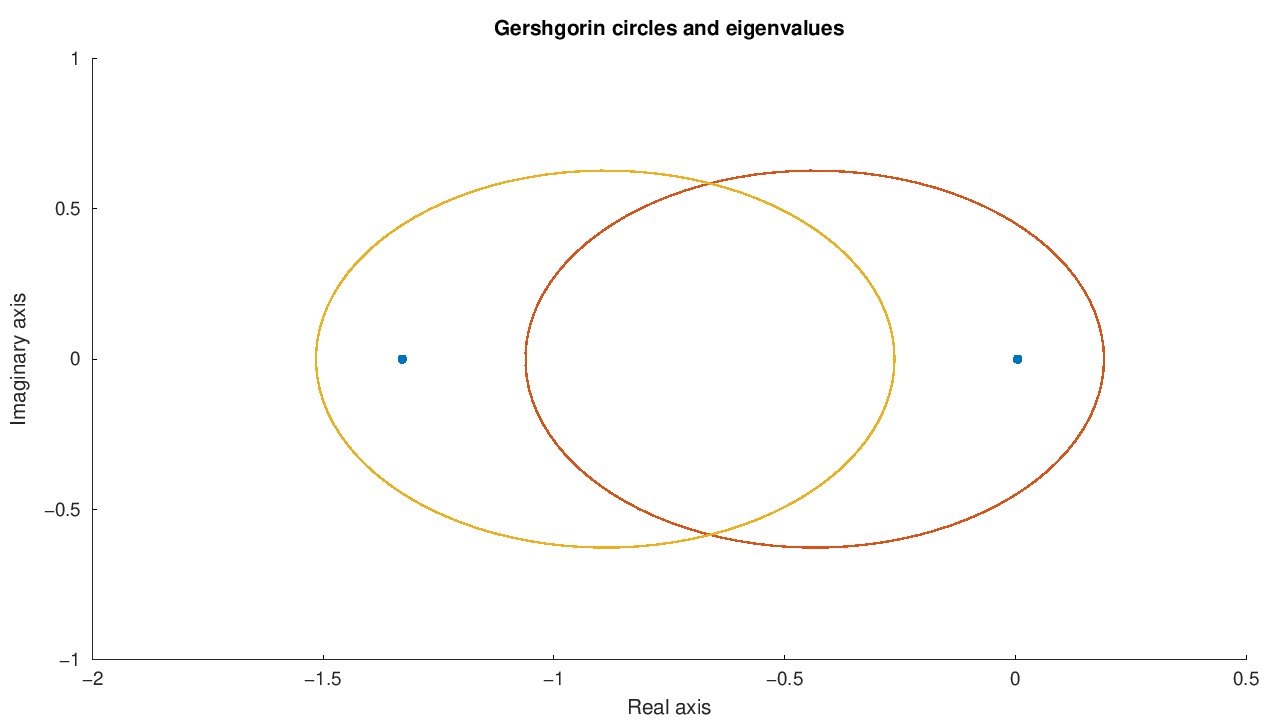

In [9]:
%plot -s 1280,720
diagonal = 2 * rand(2, 1) - 1;
corner = 2 * rand() - 1;
A = diag(diagonal) + diag(corner, -1) + diag(corner, 1);
plot_Gershgorin(A)

To find a real symmetric $3 \times 3$ matrix which has a Gershgorin circle that does not contain an eigenvalue I tried two different brute force approaches. The first one exhaustes every matrix with integer entries up to a maximum value and the second tries random matrices with entries uniformly sampled in a given interval.

Neither variant found such a matrix.

In [3]:
function found = brute_force(limit)
    range = -limit : limit;
    for d1 = range
        for d2 = range
            for d3 = range
                for a1 = range
                    for a2 = range
                        for b = range
                        
                            A = [[d1 a1 b];[a1 d2 a2];[b a2 d3]];
                            eigenvalues = eig(A);
                            centers = diag(A);
                            radii = sum(abs(A), dim=2) - abs(centers);

                            for i = 1:3
                                if all(abs(eigenvalues - centers(i)) > radii(i))
                                    found = A;
                                    return
                                endif
                            endfor
                            
                        endfor
                    endfor
                endfor
            endfor
        endfor
    endfor

    printf("No matrix was found with integer entries in {-%d,...,%d}.", limit, limit)
endfunction

In [4]:
brute_force(4)

No matrix was found with integer entries in {-4,...,4}.

In [5]:
function found = brute_force_rand(limit, max_iterations=10000)
    for _ = 1 : max_iterations
        diagonal = limit * (2 * rand(3, 1) - 1);
        middle = limit * (2 * rand(1, 2) - 1);
        corner = limit * (2 * rand() - 1);
        A = diag(diagonal) + diag(middle, 1) + diag(middle, -1) + diag(corner, 2) + diag(corner, -2);

        eigenvalues = eig(A);
        centers = diag(A);
        radii = sum(abs(A), dim=2) - abs(centers);

        for i = 1:3
            if all(abs(eigenvalues - centers(i)) > radii(i))
                found = A;
                return
            endif
        endfor
    endfor
    printf("No matrix was found with random entries in (-%d, %d) in %d iterations.", limit, limit, max_iterations)
endfunction

In [6]:
brute_force_rand(10, 100000)

No matrix was found with random entries in (-10, 10) in 100000 iterations.